In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_csv('C:/USERS/YASHN/malignant_train.CSV')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('C:/USERS/YASHN/malignant_test.CSV')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [6]:
# Checking the dimensions of the dataset
df_train.shape

(159571, 8)

In [7]:
df_test.shape

(153164, 2)

In [8]:
# Checking the column names in the train and test dataset
print("Columns present in train dataset:\n",df_train.columns)
print("\n")
print("Columns present in test dataset:\n",df_test.columns)

Columns present in train dataset:
 Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')


Columns present in test dataset:
 Index(['id', 'comment_text'], dtype='object')


In [9]:
# Checking for null values
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

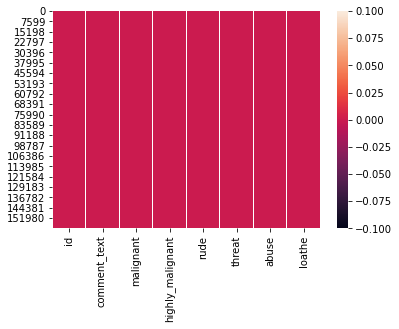

In [11]:
# plotting heatmap
sns.heatmap(df_train.isnull())

<AxesSubplot:>

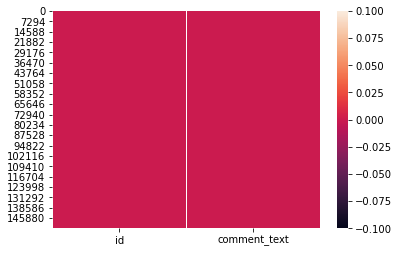

In [12]:
# plotting heatmap
sns.heatmap(df_test.isnull())

We can observe , there are no null values in our dataset.

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [15]:
# Checking Statistical Summary
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153027
top,e8cb30a6e0578521,#NAME?
freq,1,126


In [17]:
# Checking number of unique values in each column of dataset
df_train.nunique()

id                  159571
comment_text        159570
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [18]:
# Dropping id column 
df_train.drop(["id"],axis=1,inplace = True)

In [19]:
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [20]:
# Checking Value counts
df_train['malignant'].value_counts()


0    144277
1     15294
Name: malignant, dtype: int64

In [21]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [22]:
df_train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [23]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [24]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [25]:
df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [26]:
df_train['comment_text'].value_counts()

- Reliable sources have been posted, you just reject them because you have a problem with NPOV. Viewing your history shows you have a long record of clashing with anyone who wants to update the BNP page and you delete their material you don't agree with.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

malignant


0    144277
1     15294
Name: malignant, dtype: int64


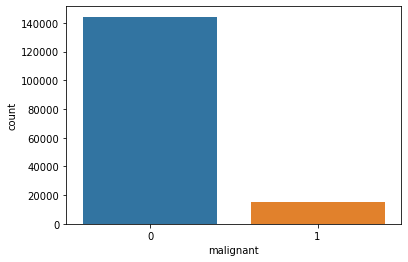

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


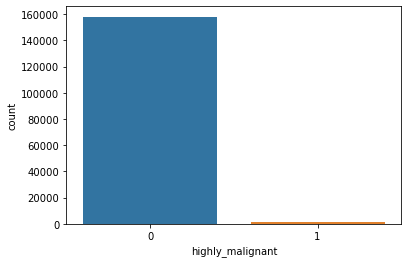

loathe


0    158166
1      1405
Name: loathe, dtype: int64


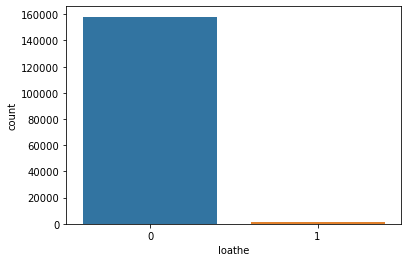

rude


0    151122
1      8449
Name: rude, dtype: int64


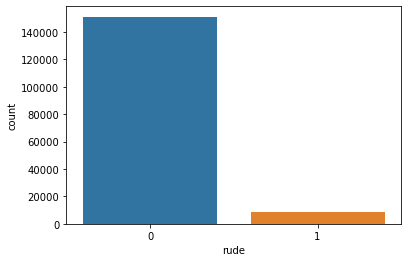

abuse


0    151694
1      7877
Name: abuse, dtype: int64


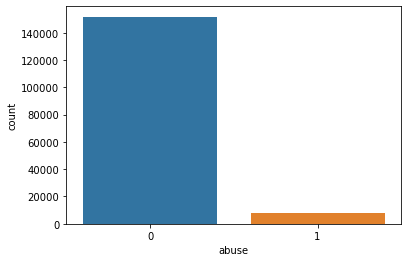

threat


0    159093
1       478
Name: threat, dtype: int64


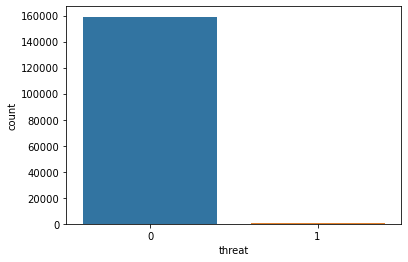

In [27]:
col_name=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col_name:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [28]:
#Checking percentage of good and bad comments from all features combiningly in dataset 
good_comments = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(good_comments)/len(df_train)*100
print('Percentage of positive comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of positive comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can observe about 90% of the comments are positive and only 10% of the comments falls down into negative.

In [29]:
# Check percentage of comments that are toxic compared to normal comments
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(col, df_train[col].value_counts(normalize=True)*100))
    print(df_train[f'{col}'].value_counts(normalize=True)*100)
    print('*'*100)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in ab

In [30]:
# Checking number of unique values in each column of dataset
df_train.nunique().to_frame("No of Unique Values")

,No of Unique Values
comment_text,159570
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


In [31]:
# Creating a new feature having negative and non negative comments for the particular comment.
cols = [ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
df_train[cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [32]:
# Label column is the sum of all the target features
df_train['label'] = df_train[cols].sum(axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


we have created a new column named 'label' which consists of both good and bad comments.

In [33]:
df_train.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [34]:
# Scaling the label column that is converting it from multiple labels into binary
df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [35]:
# Checking value counts for label after scaling
df_train.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [36]:
# Creating new column for length of comments
df_train['comment_length']=df_train.comment_text.str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [37]:
# Adding new column comment_length to check length of comment_text characters in test data
df_test['comment_length']=df_test.comment_text.str.len()
df_test

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


In [38]:
# Storing the number of counts for every target label
counts=df_train.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62797479
dtype: int64

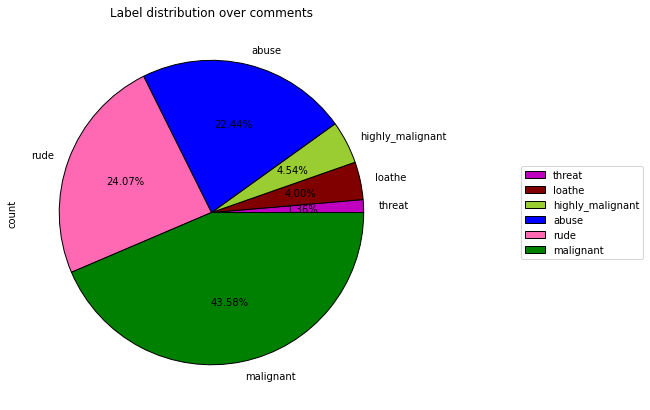

In [39]:
#  Label distribution comments using pie chart
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
colors = ["m", "maroon","yellowgreen","blue","hotpink","g"]

x = df_train[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y = 'count', title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':1, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Observations:
From the pie chart we can notice approximately 43% of the comments are malignant, 24% of the comments are rude and 22% are abuse. The count of malignant comments are high compared to other type of comments and the count of threat comments are very less.

0    143346
1     16225
Name: label, dtype: int64


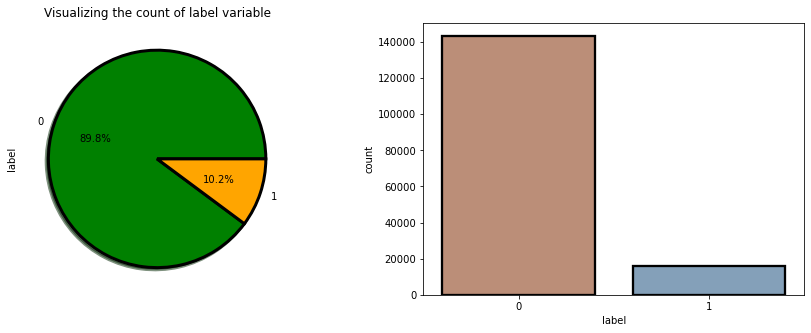

In [40]:
# Visualizing count of negative and non negative comments 
print(df_train['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["green", "orange"]
df_train['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=df_train, ax=ax[1],palette="twilight_shifted_r",linewidth=2.3, edgecolor="k")
plt.show()

Observations:
From the above plots we can observe the count of negative comments are high compared to the non negative comments. Here around 90% of the comments are turned out to be a negative comments and only 10% of them are considered to be positive or neutral comments. We can also observe the data imbalance issue here, we need to balance the data.

0    144277
1     15294
Name: malignant, dtype: int64


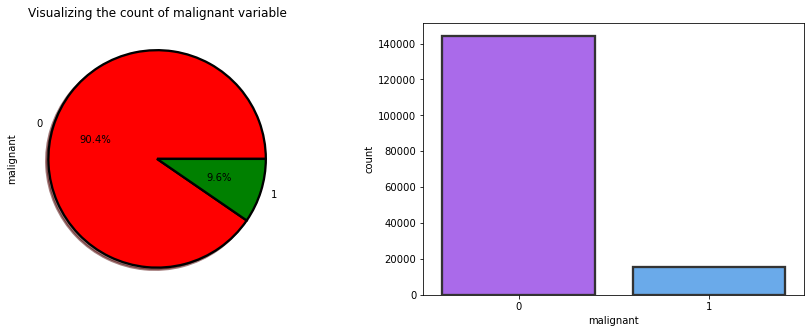

In [41]:
# Visualizing count of malignant and non malignant comments
print(df_train['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["red", "green"]
df_train['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=df_train, ax=ax[1],palette="cool_r",linewidth=2.3, edgecolor=".2")
plt.show()

Observations:
From the above plots we can observe the count of malignant comments are high compared to non malignant comments. That is around 90% of the comments are malignant and only 9.6% of the comments are good.

0    157976
1      1595
Name: highly_malignant, dtype: int64


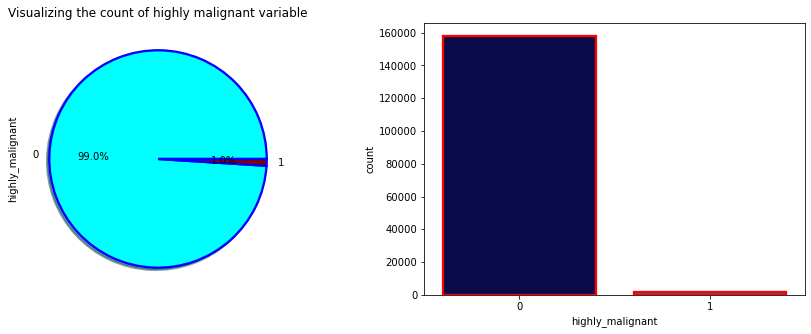

In [42]:
# Visualizing count of highly malignant and normal comments
print(df_train['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["cyan", "maroon"]
df_train['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2.3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=df_train, ax=ax[1],palette="ocean",linewidth=2.3, edgecolor="r")
plt.show()

Observations:
From the plot we can observe the count of highly malignant comments are very high which is about 99% and only 1% of the comments are normal.

0    151122
1      8449
Name: rude, dtype: int64


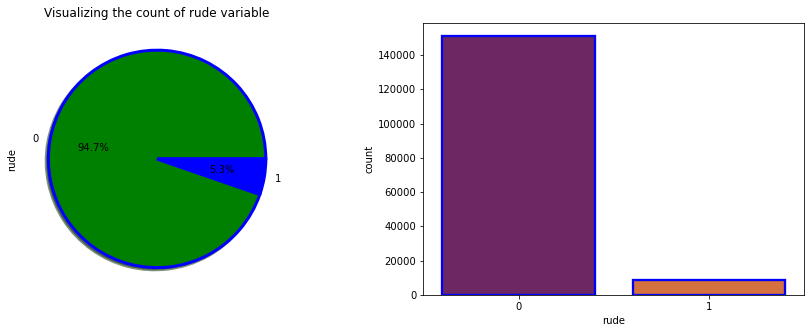

In [43]:
# Visualizing count of rude and normal comments
print(df_train['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["green", "blue"]
df_train['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=df_train, ax=ax[1],palette="inferno",linewidth=2.3, edgecolor="b")
plt.show()

Observations:
The count of rude comments are high compared to normal comments. Around 94% of the comments are falls down into rude and remaining considered to be normal comments.

0    159093
1       478
Name: threat, dtype: int64


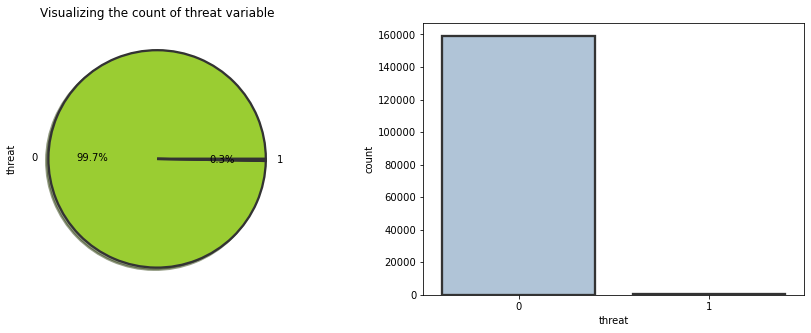

In [44]:
# Visualizing count of threat and normal comments
print(df_train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellowgreen", "orange"]
df_train['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2.3, 'edgecolor':'.2'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=df_train, ax=ax[1],palette="BuPu",linewidth=2.3, edgecolor=".2")
plt.show()

Observations:
Here also 99.7% of the comments are threat and only 0.3% of the comments are look normal.

0    159093
1       478
Name: threat, dtype: int64


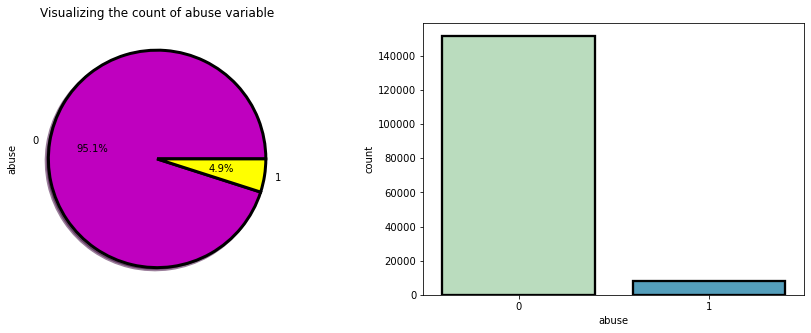

In [45]:
# Visualizing count of abuse and normal comments
print(df_train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "yellow"]
df_train['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=df_train, ax=ax[1],palette="GnBu",linewidth=2.3, edgecolor="k")
plt.show()

Observations:
The count of abusing type comments are high which has 95.1% and only 4.9% of the comments are normal.

0    158166
1      1405
Name: loathe, dtype: int64


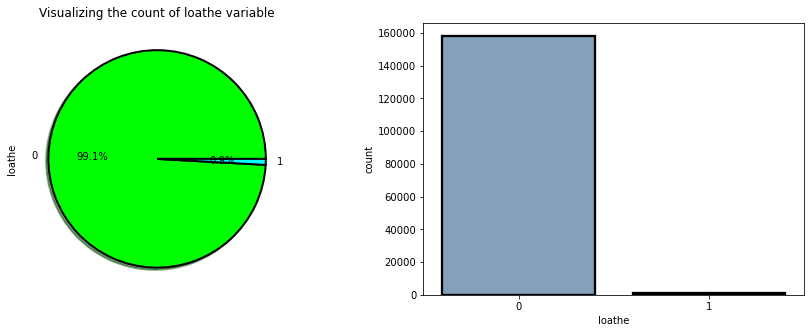

In [46]:
# Visualizing count of loathe and normal comments
print(df_train['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lime", "cyan"]
df_train['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=df_train, ax=ax[1],palette="twilight_shifted",linewidth=2.3, edgecolor="k")
plt.show()

Observations:
The count of loathe is high compared to normal text comments.

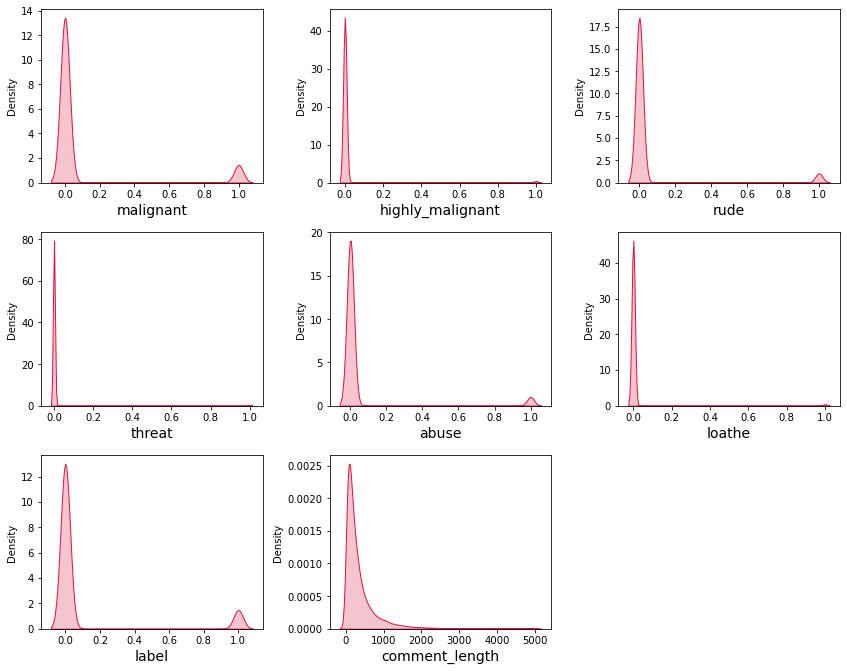

In [47]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in df_train.drop(['comment_text'],axis=1):
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_train[column],color="crimson",hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Observations:
From the distribution plots we can notice that all the columns are skewned to right except comment_label column. Since all the columns are categorical in nature there is no need to remove skewness and outliers in any of the columns.

In [48]:
# Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [49]:
# Convert all comment texts to lower case in train dataset
df_train['comment_text'] = df_train['comment_text'].str.lower()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [50]:
# Replacing '\n' in comment_text
df_test['comment_text'] = df_test['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
df_test['comment_text'] = df_test['comment_text'].str.lower()
df_test

,id,comment_text,comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,367
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,00017563c3f7919a,":if you have a look back at the source, the in...",205
4,00017695ad8997eb,i don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"one of the founding nations of the...",502


In [51]:
# Cleaning data in train dataset
# Replace email addresses with "email"
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
df_train["comment_text"] = df_train["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
df_train["comment_text"] = df_train["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_train["comment_text"] =df_train["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [52]:
# Remove stopwords
import nltk
nltk.download('wordnet')
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df_train["comment_text"] = df_train["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stop_words))
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
# Cleaning data in test dataset
# Replace email addresses with "email"
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
df_test["comment_text"] = df_test["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
df_test["comment_text"] = df_test["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [54]:
stp_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df_test["comment_text"] = df_test["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stp_words))
lemma=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(t) for t in x.split()))

In [55]:
# New column (clean_length) after removing punctuations, stopwords in train dataset
df_train['clean_length'] = df_train.comment_text.str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page numbr numbr,0,0,0,0,0,0,0,99,48
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [56]:
# New column (clean_length) after removing punctuations, stopwords in test dataset
df_test['clean_length'] = df_test.comment_text.str.len()
df_test

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [57]:
! pip install wordcloud

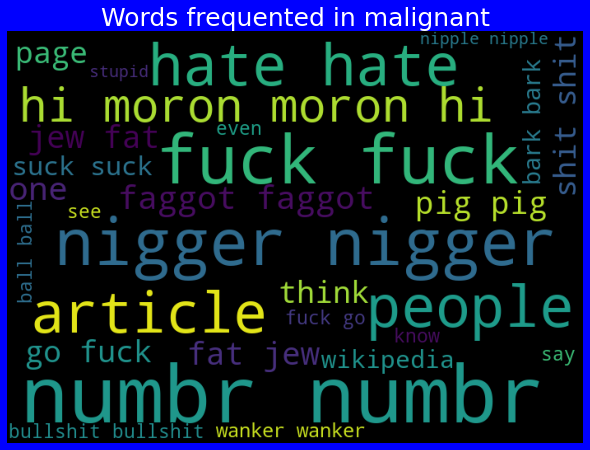

In [58]:
# Getting sense of loud words in malignant
from wordcloud import WordCloud

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
malignants = df_train['comment_text'][df_train['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

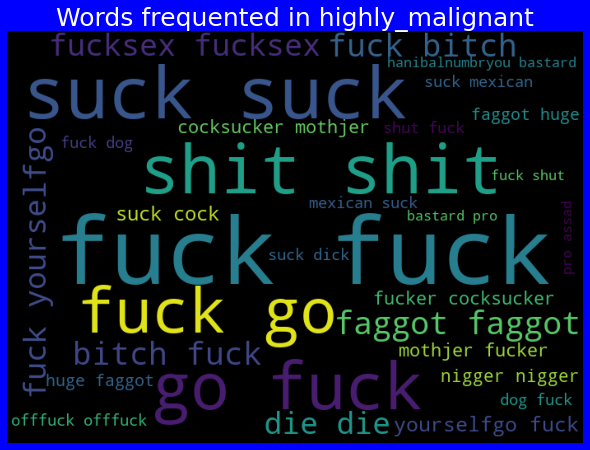

In [59]:
# Getting sense of loud words in highly malignant

# Print only rows where the toxic category label value is 1 
highly_malignants = df_train['comment_text'][df_train['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=700,height=500,background_color='black',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

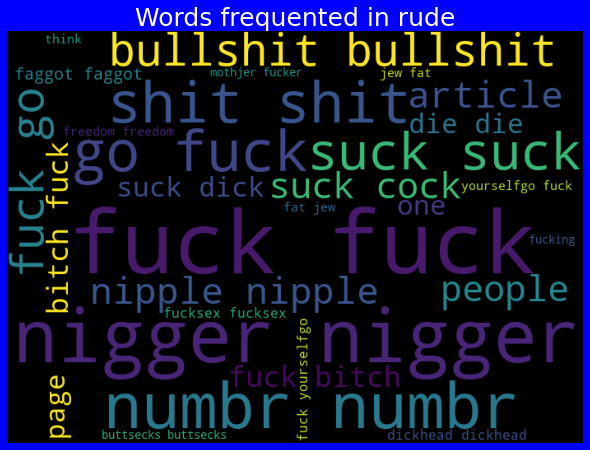

In [60]:
# Getting sense of loud words in rude
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
rude_text = df_train['comment_text'][df_train['rude']==1]

rude_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

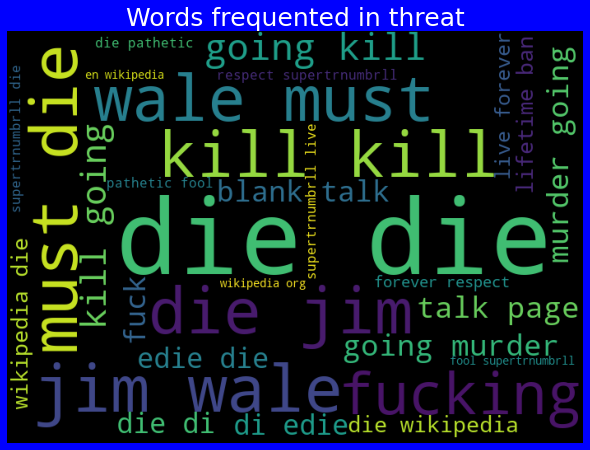

In [61]:
# Getting sense of loud words in threat
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
threats = df_train['comment_text'][df_train['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

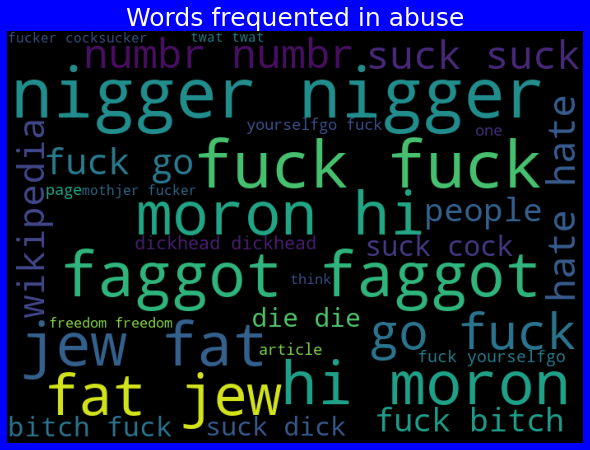

In [62]:
# Getting sense of loud words in abuse
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
abuse_text = df_train['comment_text'][df_train['abuse']==1]

abuse_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

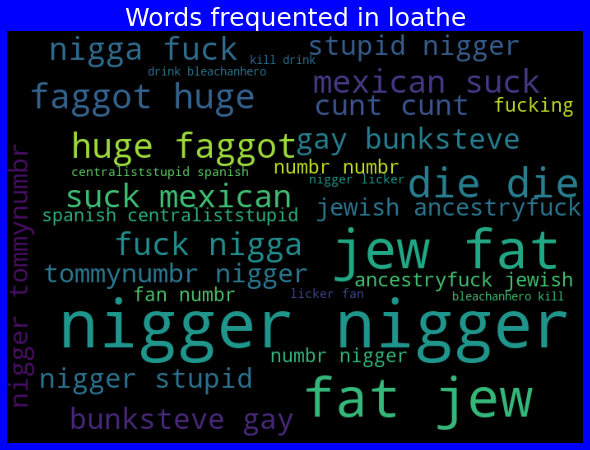

In [63]:
# Getting sense of loud words in loathe
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
loathe_text = df_train['comment_text'][df_train['loathe']==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

In [64]:
# Checking the correlation between features and the target
corr = df_train.corr()
corr

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054649,-0.052606
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.009747,0.013578
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.043097,-0.039895
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007909,-0.010036
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045239,-0.042723
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.014119,-0.008912
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051868,-0.050443
comment_length,-0.054649,0.009747,-0.043097,-0.007909,-0.045239,-0.014119,-0.051868,1.000000,0.987303
clean_length,-0.052606,0.013578,-0.039895,-0.010036,-0.042723,-0.008912,-0.050443,0.987303,1.000000


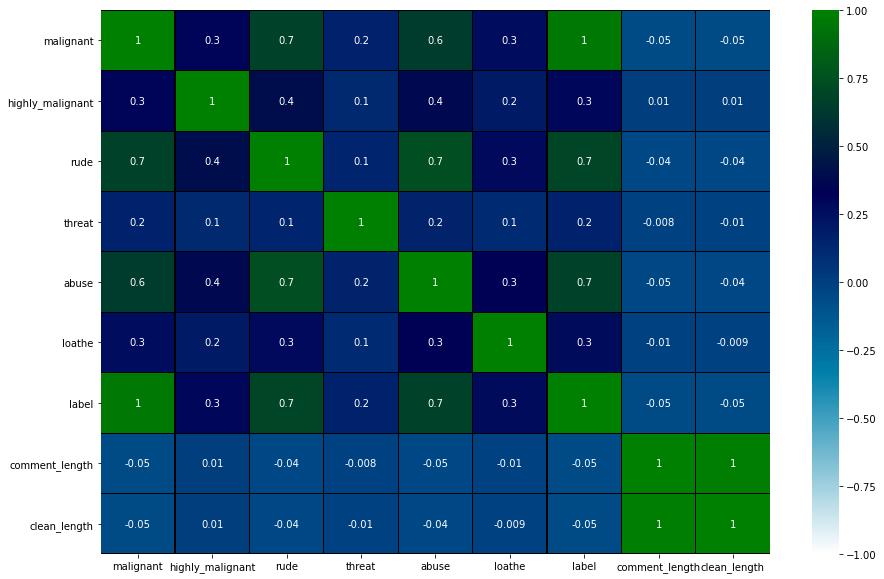

In [65]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df_train.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean_r",
            annot_kws={'size':10})
plt.yticks(rotation=0);

we can observe From the heat map that the features have some strong relation with each other. We can also observe multicollinearity problem.

In [66]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [67]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

y = df_train['label']

# Checking shape of X and y
print("Shape of x: ",X.shape)
print("Shape of y: ",y.shape)

Shape of x:  (159571, 15000)
Shape of y:  (159571,)


In [68]:
# Doing the same process for test data 
x = tf_vec.fit_transform(df_test['comment_text'])
x.shape

(153164, 15000)

In [69]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [70]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)       
print(y_train.shape,'\t',y_test.shape)

(111699, 15000) 	 (47872, 15000)
(111699,) 	 (47872,)


In [71]:
# Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [72]:
# We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [74]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9598295418938397
Test accuracy is 0.9548170120320856
[[42745   259]
 [ 1904  2964]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.92      0.61      0.73      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [75]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990957842057673
Test accuracy is 0.9404035762032086
[[41680  1324]
 [ 1529  3339]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43004
           1       0.72      0.69      0.70      4868

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [76]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990868315741412
Test accuracy is 0.9560494652406417
[[42496   508]
 [ 1596  3272]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.87      0.67      0.76      4868

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [77]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9512439681644419
Test accuracy is 0.9487591911764706
[[42548   456]
 [ 1997  2871]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.86      0.59      0.70      4868

    accuracy                           0.95     47872
   macro avg       0.91      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [78]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9201693837903652
Test accuracy is 0.9165900735294118
[[42876   128]
 [ 3865  1003]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43004
           1       0.89      0.21      0.33      4868

    accuracy                           0.92     47872
   macro avg       0.90      0.60      0.64     47872
weighted avg       0.91      0.92      0.89     47872



In [79]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, X, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990778789425152
Test accuracy is 0.9564045788770054
cross validation score : 95.70285218602322
[[42514   490]
 [ 1597  3271]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.87      0.67      0.76      4868

    accuracy                           0.96     47872
   macro avg       0.92      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



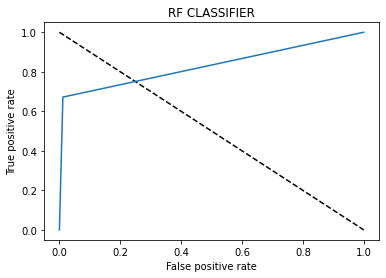

In [80]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [81]:
#Saving the model
import joblib
joblib.dump(RF,"malignant_comments_classifier.pkl")

['malignant_comments_classifier.pkl']

In [82]:
# Lets load the test data set
df_test

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [83]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2751619 stored elements in Compressed Sparse Row format>

In [85]:
predict=RF.predict(test_data)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
# Adding the predicted values to test dataframe
df_test['Predicted_Values']=predict
df_test

,id,comment_text,comment_length,clean_length,Predicted_Values
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227,0
1,0000247867823ef7,rfc title fine imo,50,18,0
2,00013b17ad220c46,source zawe ashton lapland,54,26,0
3,00017563c3f7919a,look back source information updated correct f...,205,109,0
4,00017695ad8997eb,anonymously edit article,41,24,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,1
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,0


In [88]:
# Checking values counts for predicted values
df_test.Predicted_Values.value_counts()

0    146624
1      6540
Name: Predicted_Values, dtype: int64

In [89]:
# Saving the data into csv file
df_test.to_csv("Malignant_Comments_Predicted_Test_Data.csv",index=False)

saving my test data into csv file.